In [1]:
!pip install PyALE
!pip install lime
!pip install shap
!pip install alibi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
from PyALE import ale
import lime
import lime.lime_tabular
import random
import shap
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from alibi.explainers import AnchorTabular

In [3]:
df = pd.read_csv("/kaggle/input/netnet/train_data.csv")
header = df.columns.tolist()[:-1]  
train_data = df.to_numpy()

df = pd.read_csv("/kaggle/input/netnet/test_data.csv")
test_data = df.to_numpy()

In [4]:
def normalize(data, mean, std):
    return (data - mean) / std

In [5]:
mean = np.mean(train_data[:,:-1], axis=0)
std = np.std(train_data[:,:-1], axis=0)
std[std == 0] = 1e-5

x_train_n = normalize(train_data[:,:-1], mean, std)
y_train = train_data[:,-1]

x_test_n = normalize(test_data[:,:-1], mean, std)
y_test = test_data[:,-1]

In [6]:
model = LogisticRegression()
model.fit(x_train_n, y_train)

y_pred = model.predict(x_test_n)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}")

Test Accuracy: 74.54


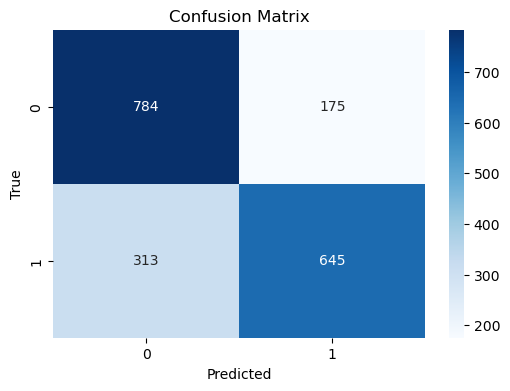

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
def visualize_feature_importance(importances, fl):
    plt.figure(figsize=(10,4))
    plt.bar(fl, importances)
    plt.xticks(rotation=45)
    plt.ylabel('importance')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

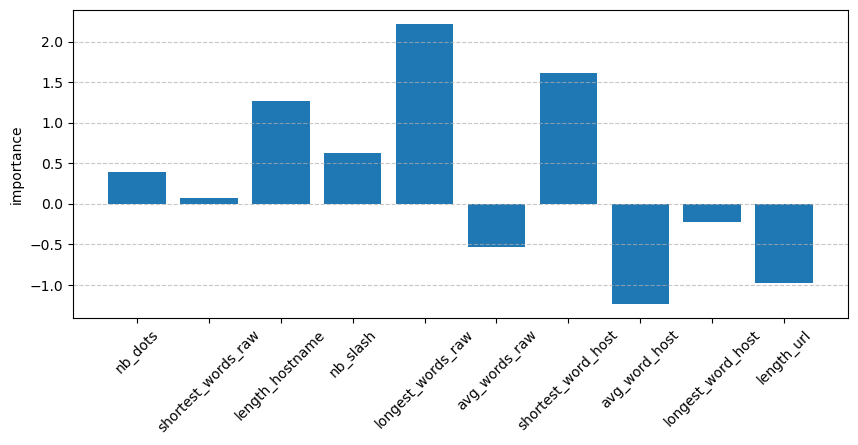

In [45]:
visualize_feature_importance(model.coef_[0], header)

In [7]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train_n, y_train)

y_pred = model.predict(x_test_n)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 74.44%


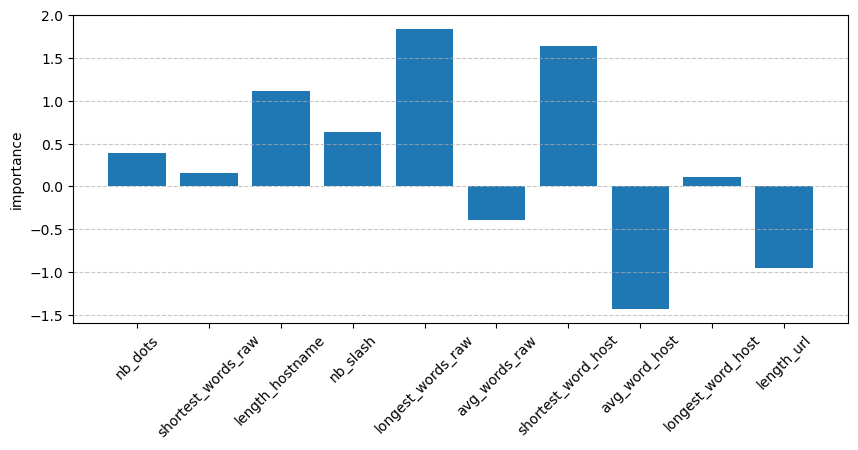

In [27]:
visualize_feature_importance(model.coef_[0], header)

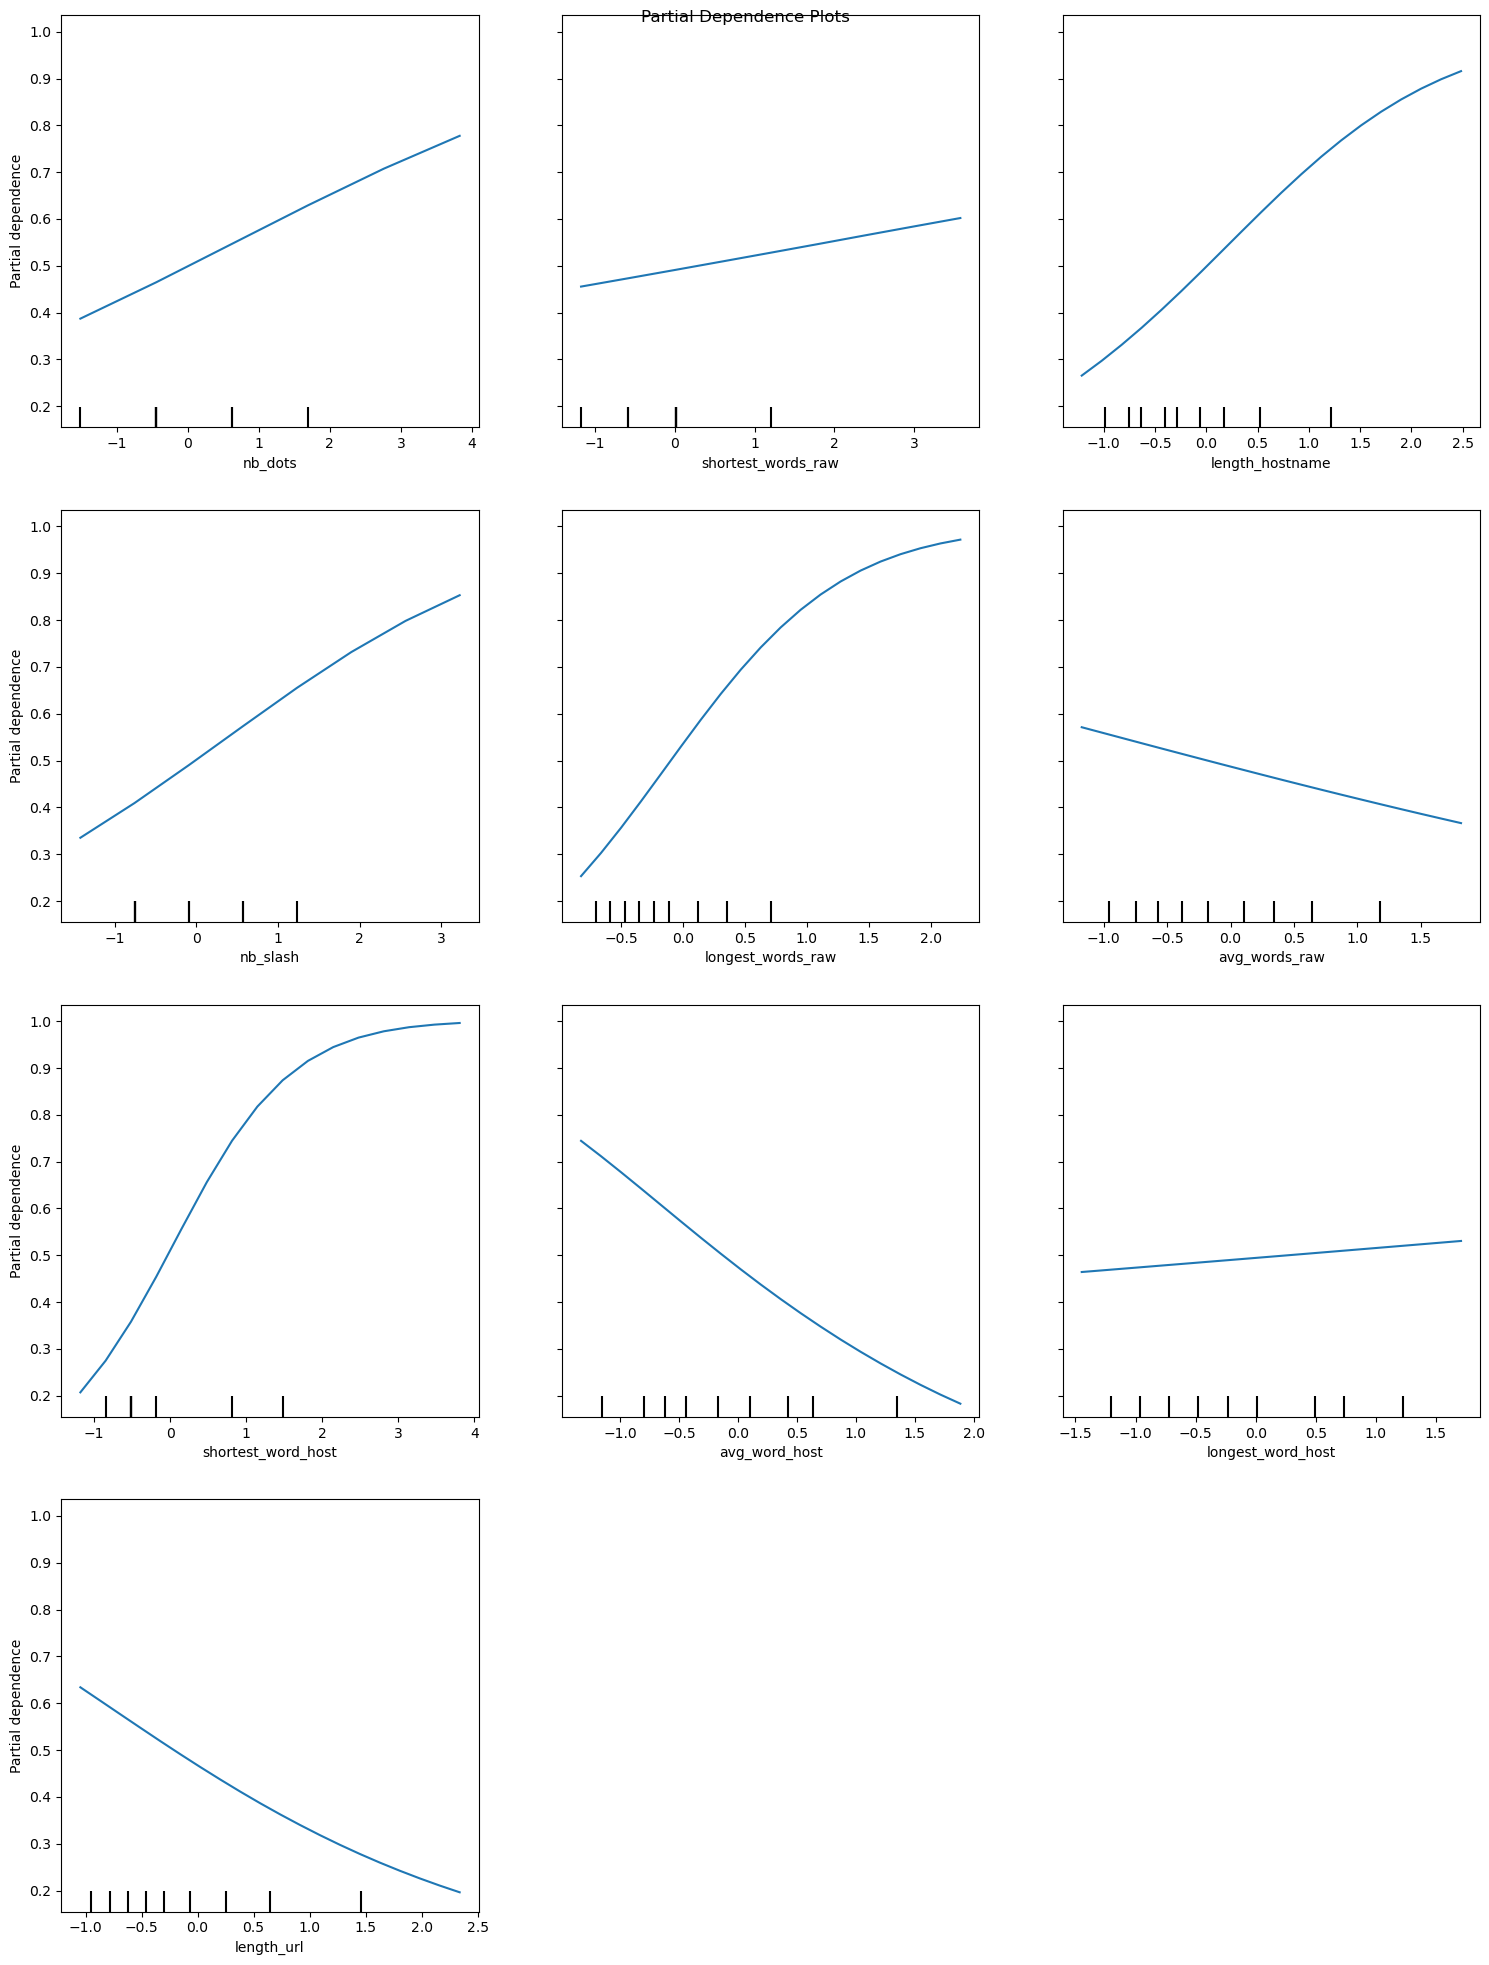

In [28]:
fig, ax = plt.subplots(figsize=(15, 20))

PartialDependenceDisplay.from_estimator(
    model,
    x_test_n,
    features=list(range(len(header))),
    feature_names=header,  
    n_cols=3,            
    ax=ax,
    grid_resolution=20     
)

plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

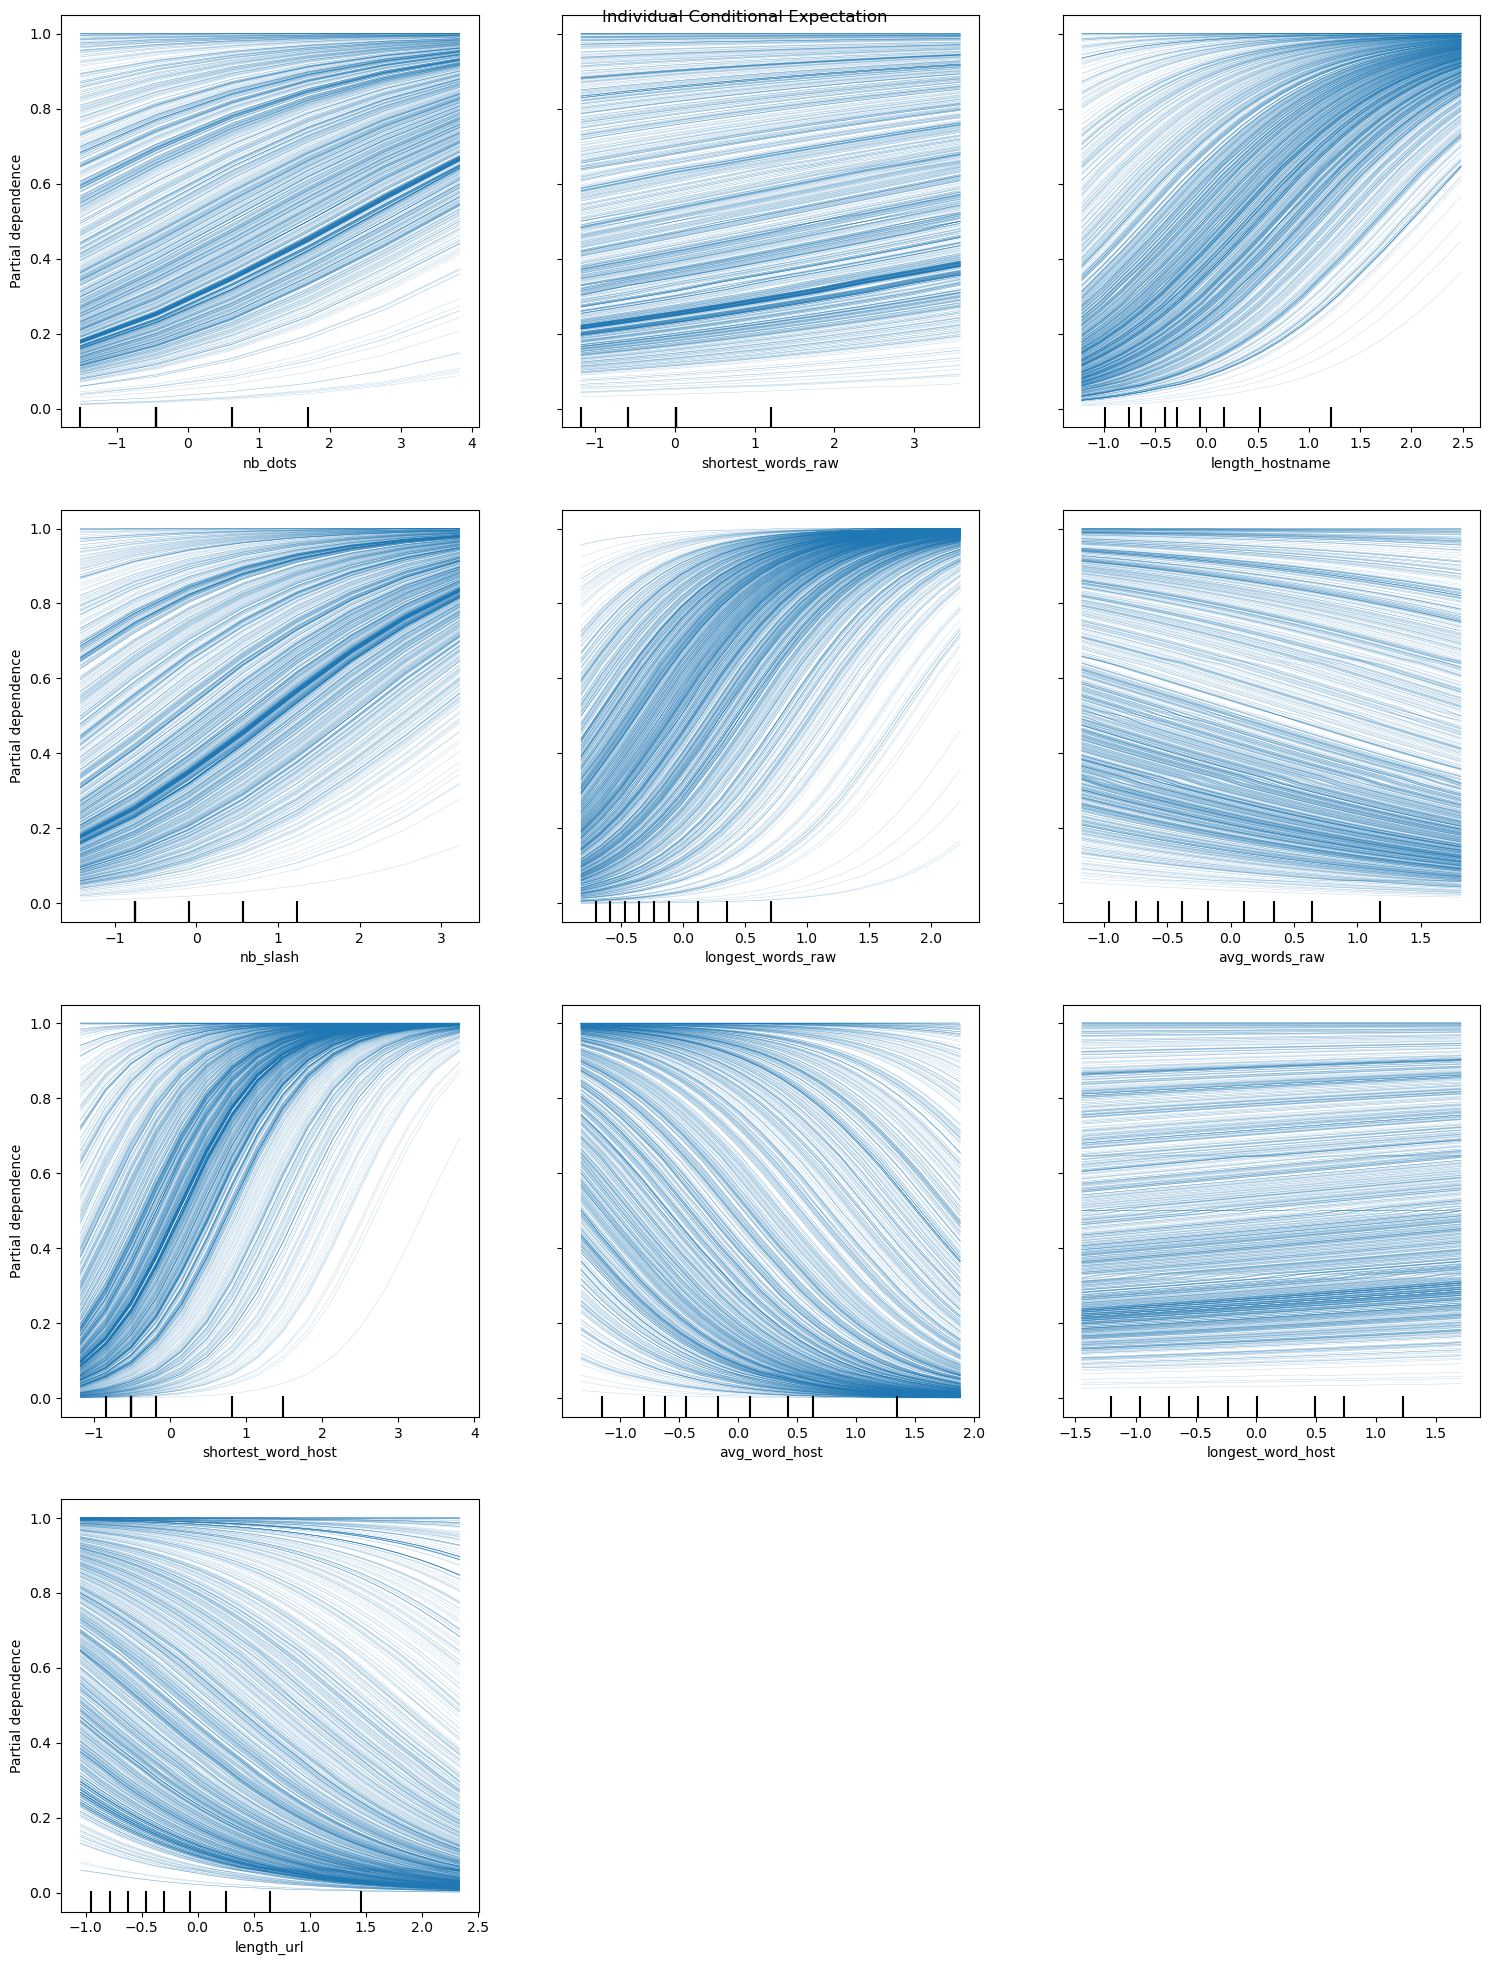

In [46]:
fig, ax = plt.subplots(figsize=(15, 20))

PartialDependenceDisplay.from_estimator(
    model, 
    x_test_n,
    features=list(range(len(header))),  
    feature_names=header,               
    kind="individual",                  
    n_cols=3,                          
    ax=ax,
    grid_resolution=20,                
    ice_lines_kw={"linewidth": 0.3, "alpha": 0.3}  
)

plt.suptitle('Individual Conditional Expectation')
plt.tight_layout()
plt.show()

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


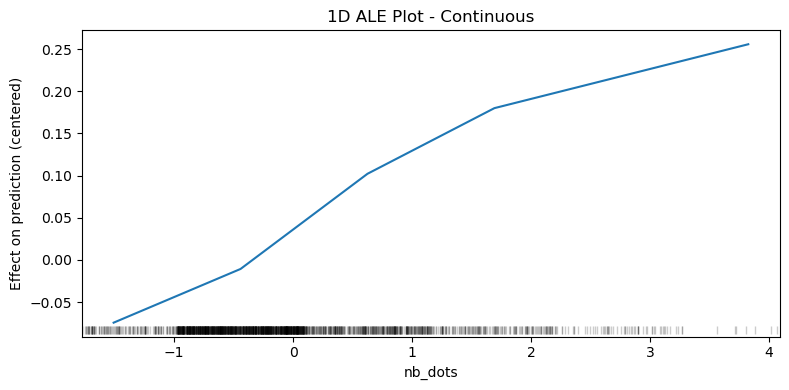

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


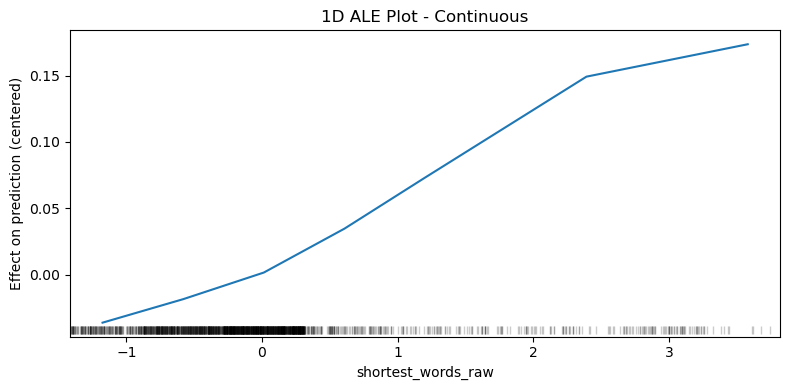

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


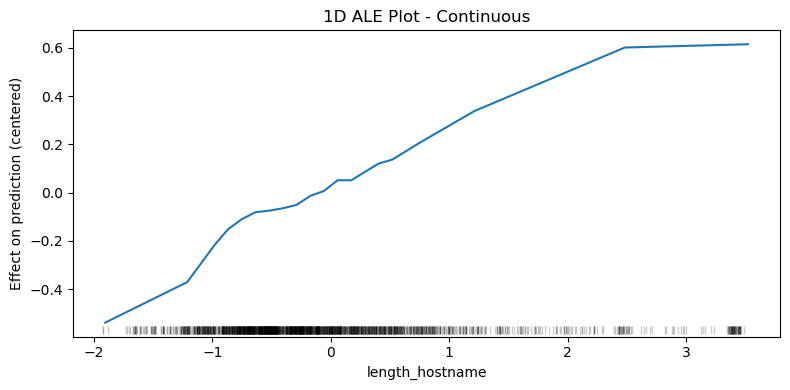

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


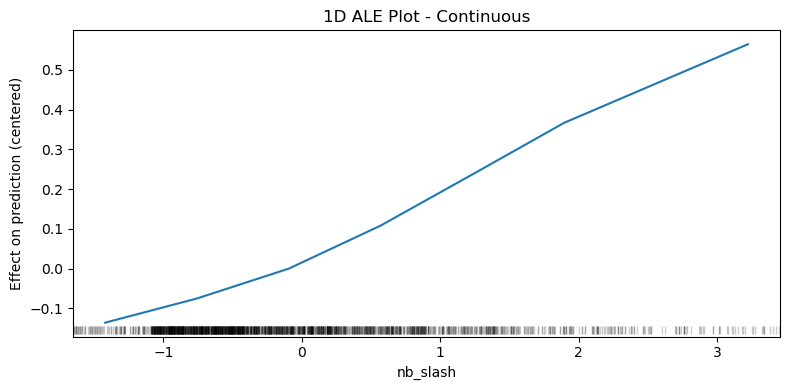

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


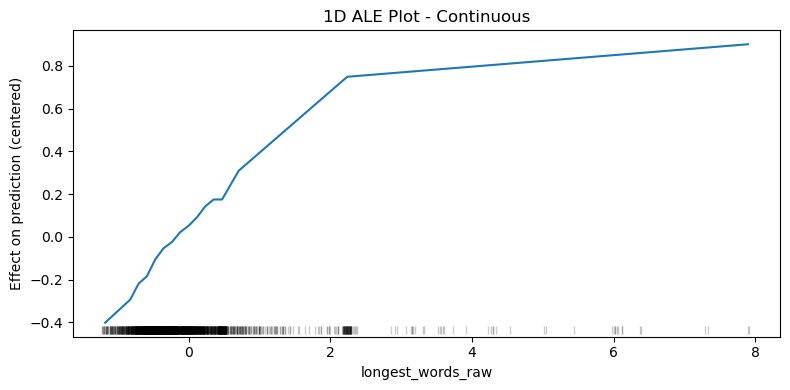

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


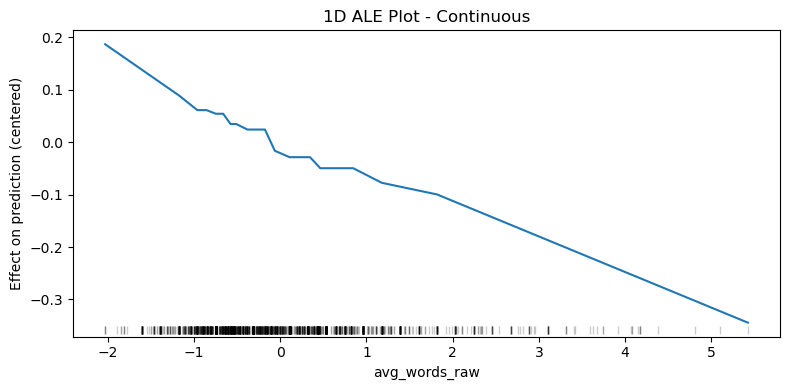

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


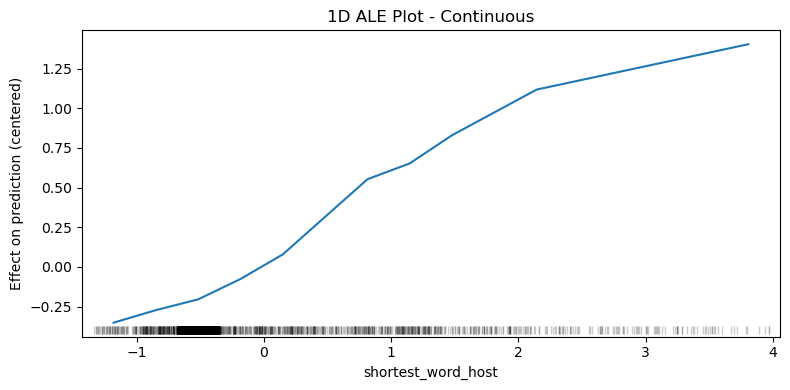

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


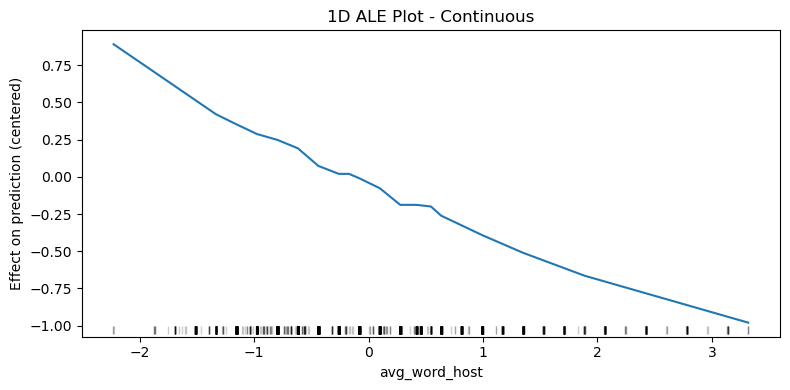

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


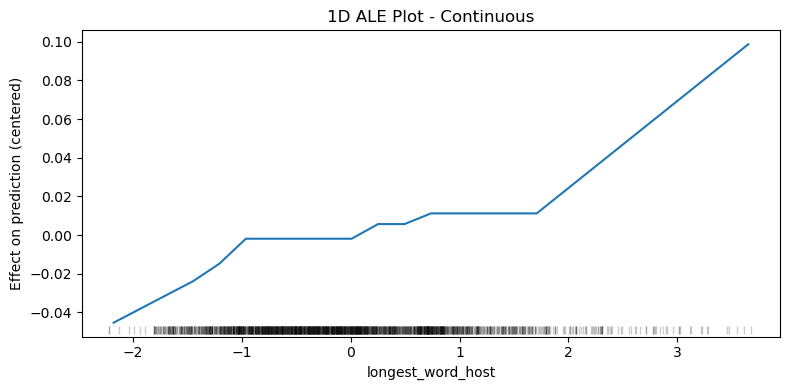

C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mohammad Ali\ana\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


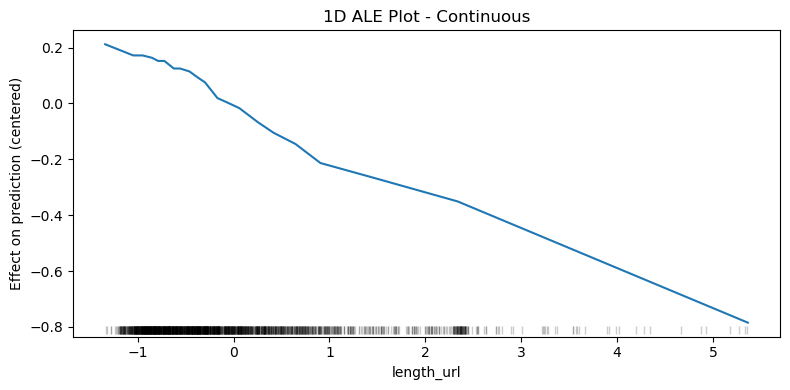

In [49]:
x_test_df = pd.DataFrame(x_test_n, columns=list(header))
for i, feature in enumerate(header):
    ale_eff = ale(X=x_test_df, model=model, feature=[feature], grid_size=20, include_CI=False, plot=True , feature_type='continuous' )


    plt.tight_layout()
    plt.show()

In [37]:
num_samples = 3
random_indices = random.sample(range(x_test_n.shape[0]), num_samples)

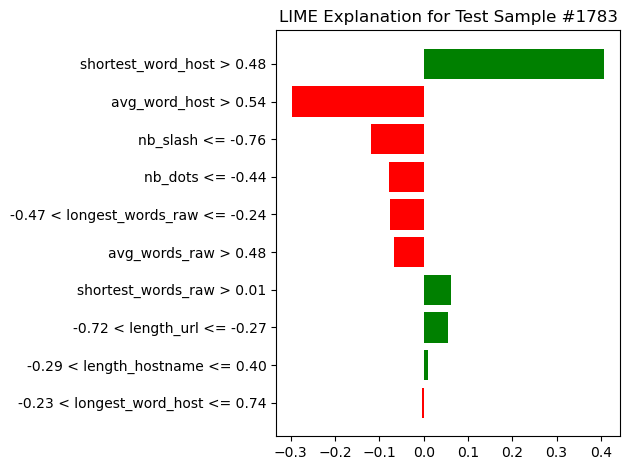

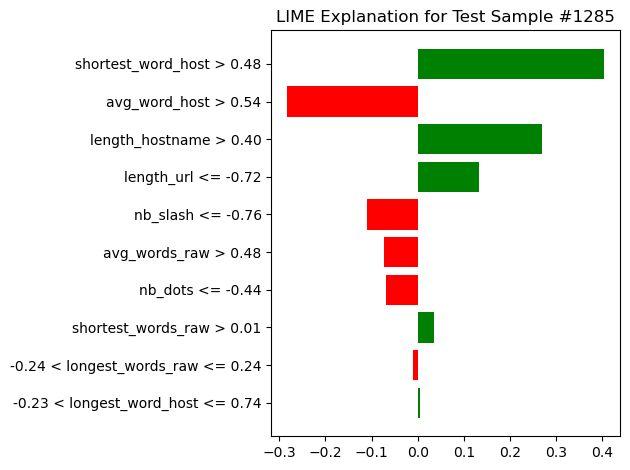

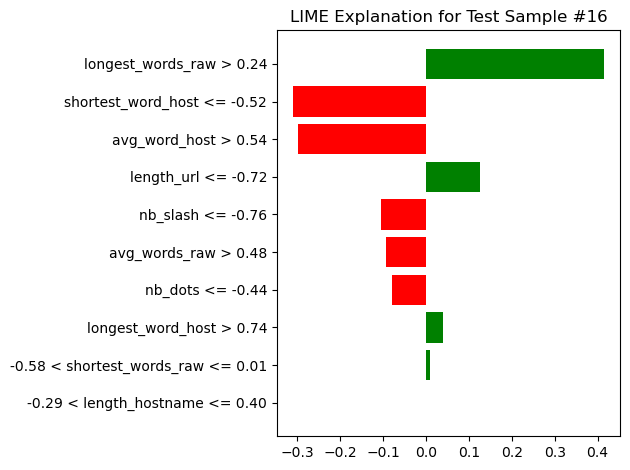

In [38]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train_n,     
    feature_names=header,        
    class_names=['0', '1'],  
    mode='classification'       
)

for i, idx in enumerate(random_indices):
    explanation = explainer.explain_instance(
        data_row=x_test_n[idx], 
        predict_fn=model.predict_proba,  
        num_features=10
    )
    
    fig = explanation.as_pyplot_figure()
    plt.title(f"LIME Explanation for Test Sample #{idx}")
    plt.tight_layout()
    plt.show()

ExactExplainer explainer: 4it [00:29, 10.00s/it]                                                                       


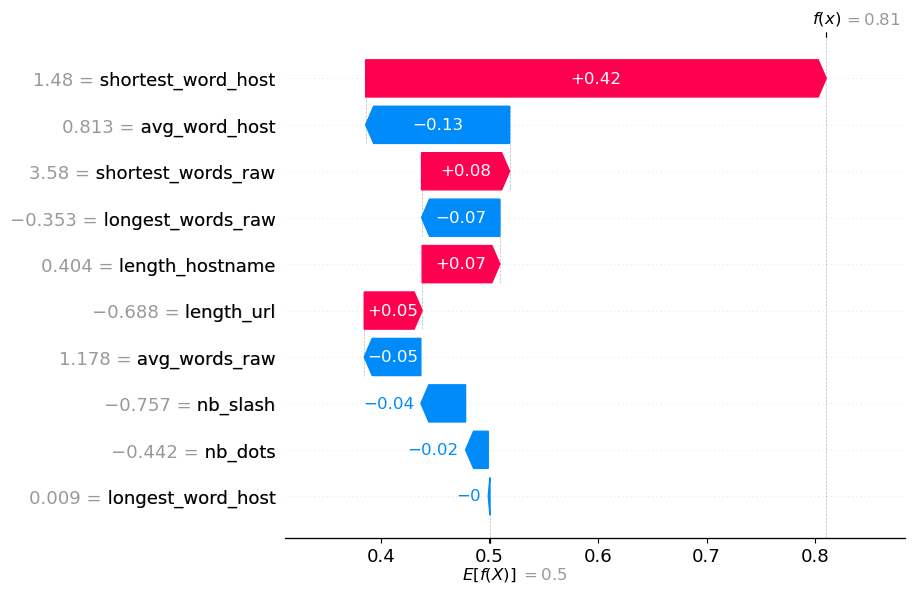

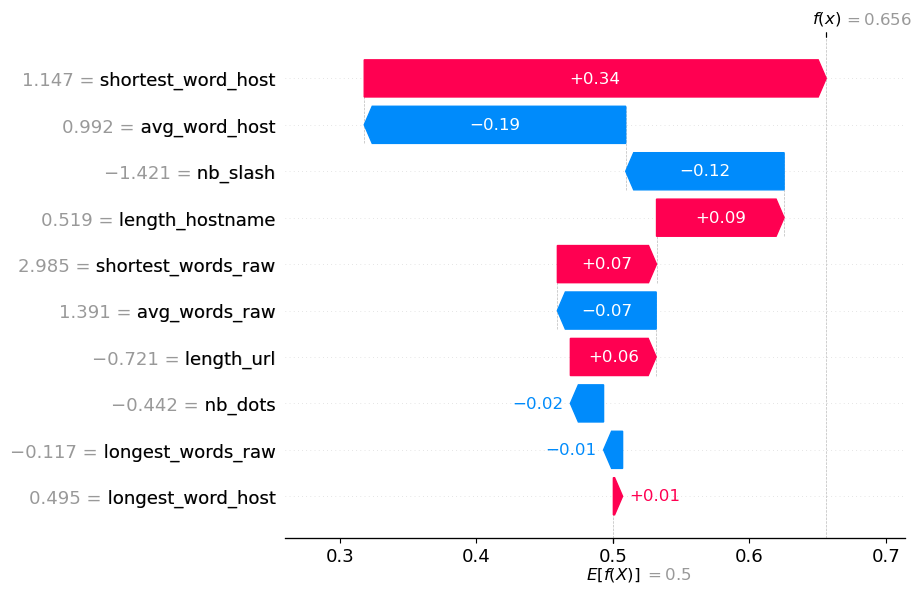

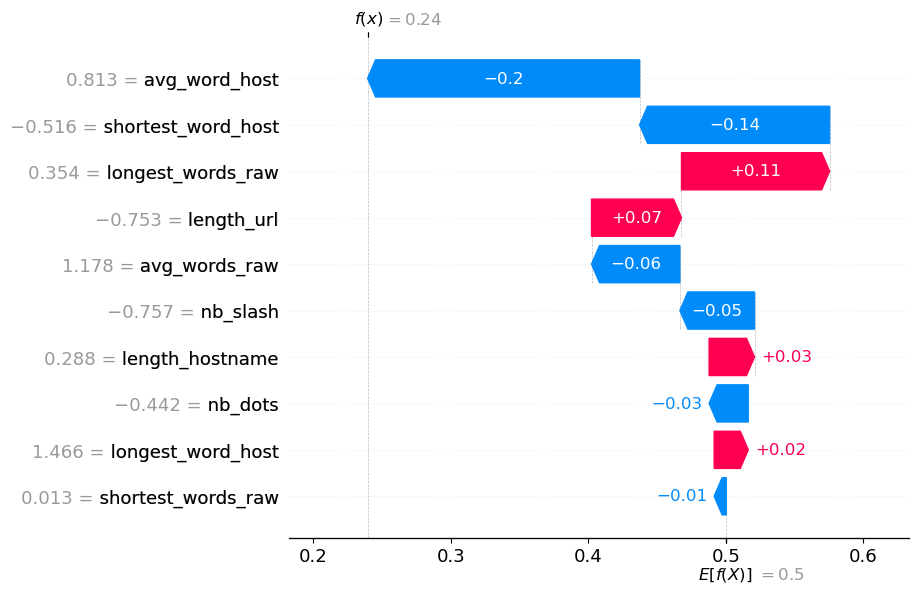

In [39]:
explainer = shap.Explainer(model.predict_proba, x_train_n, feature_names=header)

shap_values = explainer(x_test_n[random_indices])
for i, idx in enumerate(random_indices):
    shap.plots.waterfall(shap_values[i,:,1], max_display=15)
    plt.show()

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(x_train_n, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(x_test_n, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

In [28]:
class NAM(nn.Module):
    def __init__(self, num_features, hidden_dim=64):
        super(NAM, self).__init__()
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, 1)
            ) for _ in range(num_features)
        ])
        self.output_bias = nn.Parameter(torch.zeros(1))  

    def forward(self, x):
        outputs = []
        for i, net in enumerate(self.feature_nets):
            xi = x[:, i].unsqueeze(1)
            fi = net(xi)
            outputs.append(fi)
        summed = torch.stack(outputs, dim=1).sum(dim=1) + self.output_bias
        return torch.sigmoid(summed)  
        
    def feature(self, i, xi):
        return torch.sigmoid(self.feature_nets[i](xi))

In [29]:
model = NAM(num_features=x_train_n.shape[1]).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
epochs = 150

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        preds = (outputs.detach().cpu().numpy() > 0.5).astype(int)
        acc = accuracy_score(y_train, preds)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f} - Train Acc: {acc:.2f}")


model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs.cpu().numpy() > 0.5).astype(int)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 10/150 - Loss: 0.5748 - Train Acc: 0.70
Epoch 20/150 - Loss: 0.5163 - Train Acc: 0.74
Epoch 30/150 - Loss: 0.4889 - Train Acc: 0.75
Epoch 40/150 - Loss: 0.4705 - Train Acc: 0.77
Epoch 50/150 - Loss: 0.4584 - Train Acc: 0.78
Epoch 60/150 - Loss: 0.4495 - Train Acc: 0.79
Epoch 70/150 - Loss: 0.4440 - Train Acc: 0.79
Epoch 80/150 - Loss: 0.4409 - Train Acc: 0.79
Epoch 90/150 - Loss: 0.4386 - Train Acc: 0.79
Epoch 100/150 - Loss: 0.4367 - Train Acc: 0.79
Epoch 110/150 - Loss: 0.4352 - Train Acc: 0.79
Epoch 120/150 - Loss: 0.4337 - Train Acc: 0.80
Epoch 130/150 - Loss: 0.4323 - Train Acc: 0.80
Epoch 140/150 - Loss: 0.4310 - Train Acc: 0.80
Epoch 150/150 - Loss: 0.4299 - Train Acc: 0.80

Test Accuracy: 79.39%


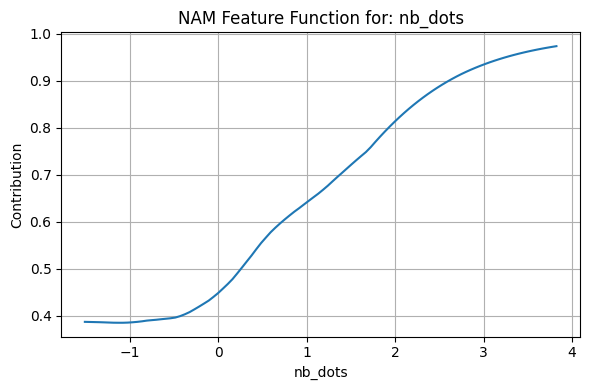

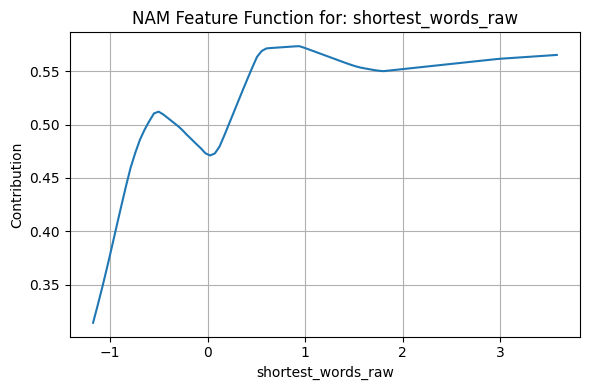

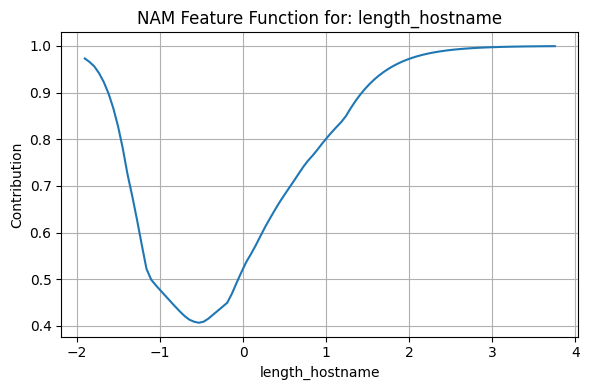

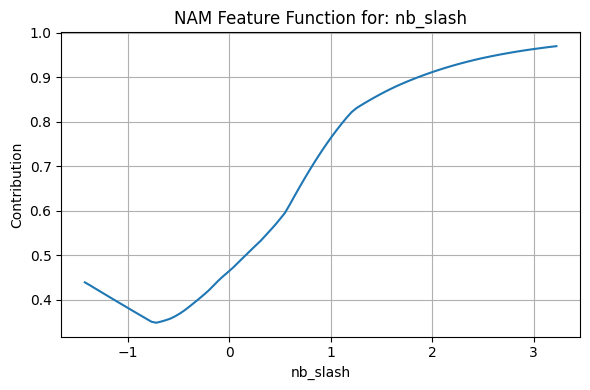

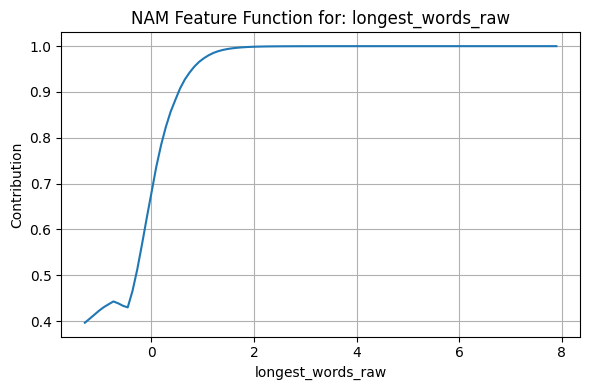

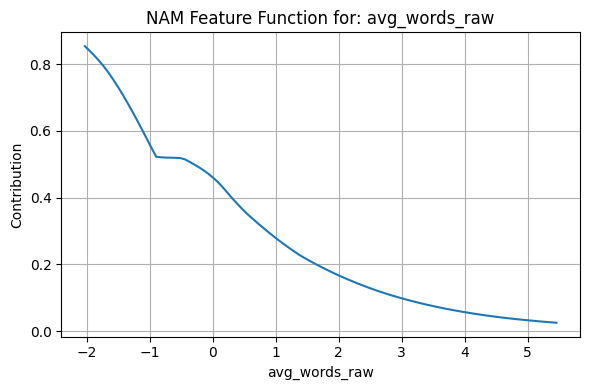

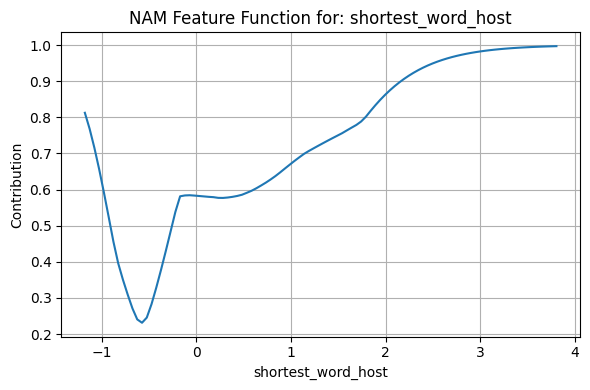

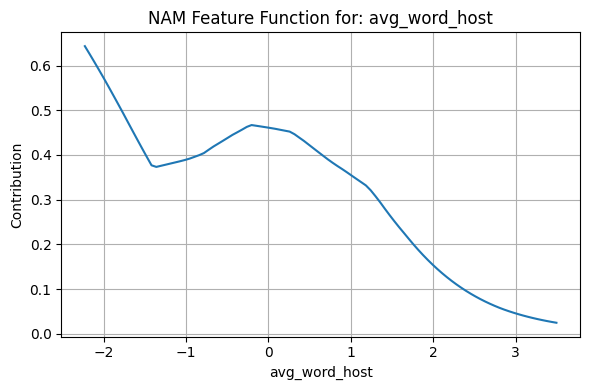

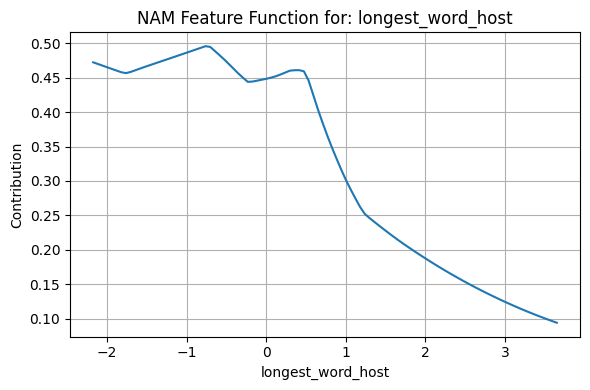

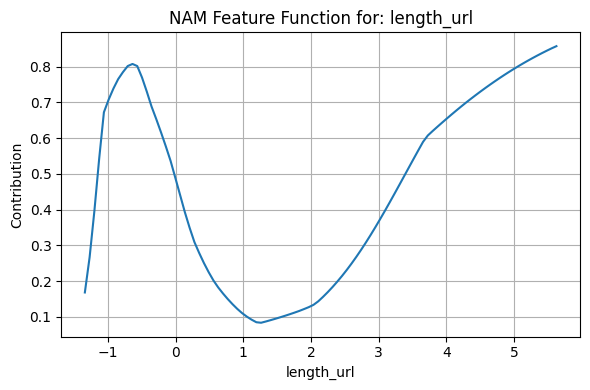

In [30]:
model.eval()
for i , feature in enumerate(header):
    x_vals = np.linspace(x_train_n[:, i].min(), x_train_n[:, i].max(), 100).reshape(-1, 1)
    xi_tensor = torch.tensor(x_vals, dtype=torch.float32)

    with torch.no_grad():
        fi_vals = model.feature(i,xi_tensor).squeeze().numpy()


    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, fi_vals)
    plt.title(f"NAM Feature Function for: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Contribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [69]:
idx = random.randint(0, x_test_n.shape[0] - 1)
instance = x_test_n[idx]
print("Instance to explain:", instance, "Instance label:", model.predict(instance.reshape(1,-1)))

explainer = AnchorTabular(model.predict, header)
explainer.fit(x_train_n, disc_perc=(33,66))  

explanation = explainer.explain(instance, threshold=0.8)

if explanation.precision >= 0.8 and explanation.coverage >= 0.4:
    print("\nAnchor Explanation Found:")
    print("Anchor:", explanation.anchor)
    print(f"Precision: {explanation.precision:.2f}")
    print(f"Coverage: {explanation.coverage:.2f}")
else:
    print("\nNo suitable anchor found (precision or coverage too low).")
    print(f"Precision: {explanation.precision:.2f}")
    print(f"Coverage: {explanation.coverage:.2f}")


Instance to explain: [ 6.24582083e-01 -1.17573933e+00 -5.20435214e-01  5.69446446e-01
  3.84255793e-04 -1.76650812e-01 -5.15526866e-01 -4.39613994e-01
 -2.33769648e-01 -3.74127785e-02] Instance label: [0.]

Anchor Explanation Found:
Anchor: ['shortest_word_host <= -0.18', 'length_url <= 0.09']
Precision: 0.89
Coverage: 0.46
